In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_excel('wpbc.train.xlsx')
df_test = pd.read_excel('wpbc.test.xlsx')

In [3]:
train = df_train
test = df_test

In [4]:
train.shape

(119, 34)

In [5]:
test.shape

(79, 34)

In [6]:
train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,49.672269,17.295378,21.730168,114.283445,959.558824,0.103563,0.147996,0.161153,0.088738,0.195461,...,140.731429,1404.467227,0.146047,0.386230,0.461728,0.184174,0.331071,0.093105,2.794958,11.470588
std,35.348893,3.299074,3.936078,22.228388,365.325185,0.012656,0.052000,0.069368,0.034257,0.027044,...,29.733935,603.495020,0.021932,0.168832,0.178715,0.045291,0.074711,0.023001,2.067663,52.220332
min,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.056160,0.026850,0.020310,0.142800,...,85.100000,508.100000,0.100900,0.079740,0.061200,0.071600,0.197800,0.060330,0.400000,0.000000
25%,17.000000,15.000000,18.985000,98.090000,690.000000,0.094370,0.111300,0.110550,0.063105,0.179450,...,117.800000,944.150000,0.131450,0.265300,0.346100,0.155450,0.280900,0.076850,1.500000,0.000000
50%,44.000000,17.140000,21.510000,111.800000,915.300000,0.103200,0.136500,0.153900,0.087440,0.190900,...,135.200000,1292.000000,0.144600,0.384100,0.425100,0.182700,0.315100,0.089990,2.400000,1.000000
75%,76.000000,19.635000,23.955000,130.050000,1214.000000,0.112150,0.177100,0.206200,0.106650,0.209350,...,160.750000,1727.500000,0.155500,0.433450,0.540050,0.211400,0.368600,0.102500,3.400000,4.000000
max,123.000000,27.220000,33.560000,182.100000,2250.000000,0.142500,0.311400,0.357900,0.187800,0.304000,...,232.200000,3903.000000,0.218400,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,333.000000


In [7]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

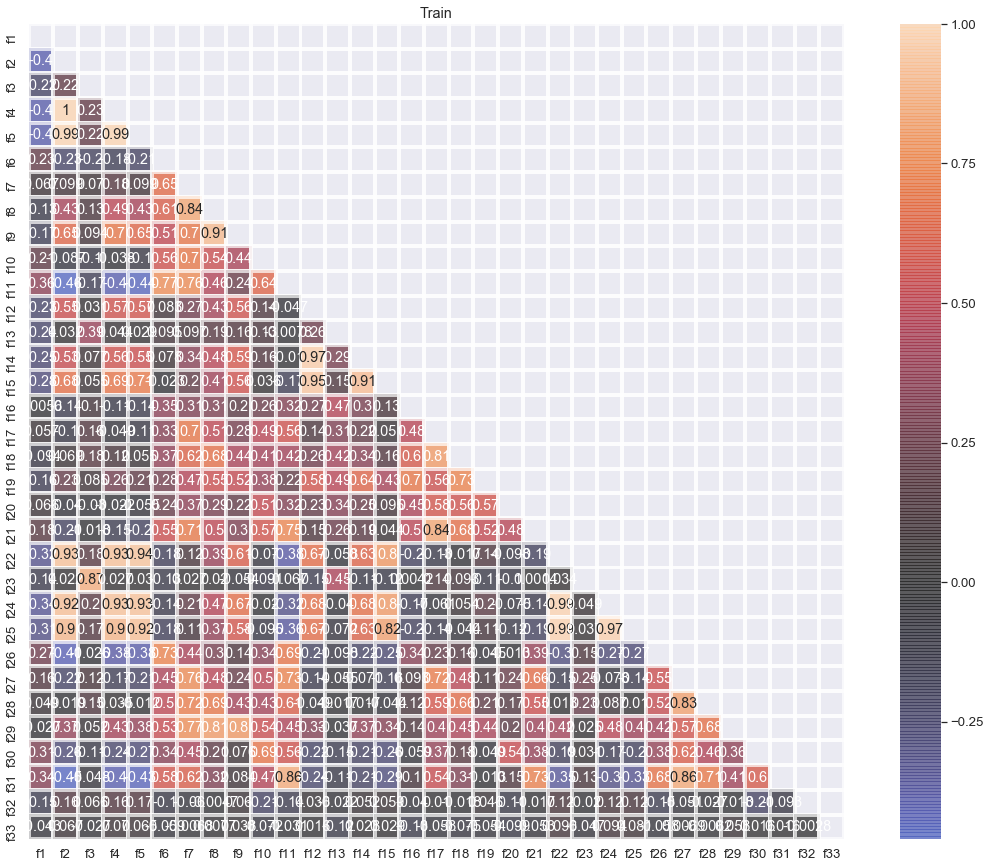

In [8]:
plot_df(train, 'Train')

In [9]:
print(train.columns)

Index(['class', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33'],
      dtype='object')


In [10]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [11]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [12]:
temp_tr_ans = train[class_name]
temp_ts_ans = test[class_name]
class_count = len(temp_tr_ans.unique())
print(class_count)

2


In [13]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [14]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

#결측치 채우기 if 결측치가 ?일 경우 - 먼저 ?를 특정한수(ex.333)으로 변경

from sklearn.impute import SimpleImputer

rep_0 = SimpleImputer(missing_values=333, strategy="mean")

tr_data = rep_0.fit_transform(tr_data)
ts_data = rep_0.fit_transform(ts_data)

In [15]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans, _ = pd.factorize(temp_tr_ans, sort=True)
ts_ans, _ = pd.factorize(temp_ts_ans, sort=True)

In [16]:
tr_ans

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [18]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [19]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [20]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [21]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,12]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [22]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

W0709 21:04:36.602367  7620 deprecation.py:506] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0709 21:04:37.682612  7620 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/64
119/119 [==============================] - 1s 12ms/sample - loss: 1.1845 - acc: 0.4958
Epoch 2/64
119/119 [==============================] - 0s 412us/sample - loss: 1.1049 - acc: 0.5294
Epoch 3/64
119/119 [==============================] - 0s 361us/sample - loss: 1.0013 - acc: 0.6723
Epoch 4/64
119/119 [==============================] - 0s 345us/sample - loss: 1.1115 - acc: 0.5546
Epoch 5/64
119/119 [==============================] - 0s 336us/sample - loss: 1.1231 - acc: 0.5546
Epoch 6/64
119/119 [==============================] - 0s 345us/sample - loss: 1.0423 - acc: 0.6218
Epoch 7/64
119/119 [==============================] - 0s 328us/sample - loss: 1.0110 - acc: 0.6471
Epoch 8/64
119/119 [==============================] - 0s 328us/sample - loss: 1.0813 - acc: 0.5966
Epoch 9/64
119/119 [==============================] - 0s 319us/sample - loss: 1.0740 - acc: 0.5798
Epoch 10/64
119/119 [==============================] - 0s 319us/sample - loss: 1.0188 - acc: 0.6218
Epoch 11/6

In [25]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
119/119 [==============================] - 1s 4ms/sample - loss: 1.1203 - acc: 0.5294
Epoch 2/64
119/119 [==============================] - 0s 210us/sample - loss: 1.0099 - acc: 0.5210
Epoch 3/64
119/119 [==============================] - 0s 218us/sample - loss: 0.9820 - acc: 0.5882
Epoch 4/64
119/119 [==============================] - 0s 210us/sample - loss: 0.8849 - acc: 0.6639
Epoch 5/64
119/119 [==============================] - 0s 185us/sample - loss: 0.9679 - acc: 0.6050
Epoch 6/64
119/119 [==============================] - 0s 168us/sample - loss: 0.8611 - acc: 0.7227
Epoch 7/64
119/119 [==============================] - 0s 160us/sample - loss: 0.8248 - acc: 0.6891
Epoch 8/64
119/119 [==============================] - 0s 160us/sample - loss: 0.8453 - acc: 0.6471
Epoch 9/64
119/119 [==============================] - 0s 168us/sample - loss: 0.8563 - acc: 0.6975
Epoch 10/64
119/119 [==============================] - 0s 160us/sample - loss: 0.7789 - acc: 0.7899
Epoch 11/64

In [26]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.823529 using {'activation': 'elu', 'hidden_layers': 12, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.739496 (0.030880) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.731092 (0.027080) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.647059 (0.183241) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.739496 (0.043669) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.714286 (0.051309) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.663866 (0.117253) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.680672 (0.121162) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.714286 (0.086957) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_

In [27]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.798319 using {'activation': <function leaky_relu at 0x000001F54D2D2598>, 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.731092 (0.068187) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.697479 (0.075222) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.714286 (0.061086) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.739496 (0.025426) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.739496 (0.069513) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.680672 (0.034445) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.739496 (0.065318) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.680672 (0.049467) with: {'activation': 'elu', 'hidden

In [28]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.7848101265822784
Confusion Matrix
[[55  5]
 [12  7]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        60
         1.0       0.58      0.37      0.45        19

   micro avg       0.78      0.78      0.78        79
   macro avg       0.70      0.64      0.66        79
weighted avg       0.76      0.78      0.77        79



In [29]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.7468354430379747
Confusion Matrix
[[54  6]
 [14  5]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        60
         1.0       0.45      0.26      0.33        19

   micro avg       0.75      0.75      0.75        79
   macro avg       0.62      0.58      0.59        79
weighted avg       0.71      0.75      0.72        79



In [30]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)